# 🧭 **Exploratory Data Analysis (EDA): Flights Dataset**

This notebook marks the **Exploratory Data Analysis (EDA)** phase within our **Travel MLOps Project**. Our focus is the **Flights dataset**, which we will dissect to uncover critical insights, identify data quality issues, and lay a robust groundwork for developing our **Flight Price Prediction Model**.

🎯 **Primary Goal of this EDA**:
To gather the necessary understanding and insights to construct a high-performing **Regression Model** capable of accurately predicting flight prices. This model will leverage key features including distance, time, flight class, agency, and travel route.

---

## 📦 **Dataset At a Glance: Flights**

The **Flights dataset** provides structured records of user flight bookings. It encompasses details on travel routes, flight characteristics, pricing (our target variable), and booking agencies.

| Column       | Description                                     |
|--------------|-------------------------------------------------|
| `travelCode` | Unique identifier for each travel itinerary     |
| `userCode`   | Identifier for the user (links to Users table)  |
| `from`       | Origin city/airport of the flight               |
| `to`         | Destination city/airport of the flight          |
| `flightType` | Service class of the flight (e.g., Economy, First Class) |
| `price`      | **Target Variable**: Cost of the flight (USD)   |
| `time`       | Flight duration (in hours)                      |
| `distance`   | Flight distance (e.g., in kilometers or miles)  |
| `agency`     | Airline or travel agency facilitating the booking|
| `date`       | Date of the flight departure                    |

---

## 🎯 **Key Objectives of this Analysis**

This EDA serves several critical functions in our model development lifecycle:

-   **Deep Dive into Data Structure:** We will thoroughly examine the dataset's schema, data types, and the distributions of categorical and numerical features.
-   **Pinpoint Data Quality Concerns:** Our investigation will focus on identifying and quantifying issues such as missing values, outliers, anomalies, and duplicate records.
-   **Evaluate Feature Relationships and Importance:** We aim to understand how each feature correlates with the target variable (`price`) and with other features, highlighting potential predictors.
-   **Inform Preprocessing and Feature Engineering:** The insights gained will directly guide the strategies for data cleaning, transformation, feature selection, and the creation of new, impactful features for the **Flight Price Prediction Model**.

---

## 🔍 **Analytical Approach**

Our exploration of the Flights dataset will involve a comprehensive analysis using descriptive statistics, various data visualizations (histograms, scatter plots, box plots), and correlation studies.

The findings from this process are crucial, as they will directly inform our **feature selection criteria, data transformation techniques, and the overall design of our model training pipeline**, all aimed at achieving accurate flight price predictions.

> Given the manageable number of features in this dataset, we will employ a thorough visualization strategy. This includes generating pair plots for numerical features, frequency plots for categorical features, and comparative plots (like box plots) across numerical and categorical feature combinations. This ensures a comprehensive understanding of inter-feature relationships and patterns.

Let's dive into the data!

### **Import Necessary Libraries and Packages**

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import os

from sklearn.model_selection import train_test_split


In [3]:
# Move to the parent directory
import sys

sys.path.append("../")

import utils
import importlib

importlib.reload(utils)  # Force reload

from utils.data_utils import (
    check_duplicates,
    generate_eda_report,
    get_date_stats,
    get_date_stats,
    count_rows_between_dates,
    check_missing,
    optimize_dtypes,
)

from utils.plots_utils import (
    plot_flights_per_year,
    plot_flights_per_month,
    flights_distribution,
)

from utils.data_splitting import chronological_split

In [4]:
print(dir(utils.data_utils))


['ProfileReport', 'Settings', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'check_duplicates', 'check_missing', 'count_rows_between_dates', 'generate_eda_report', 'get_date_stats', 'mdates', 'np', 'optimize_dtypes', 'pd', 'plt', 'sns', 'train_test_split', 'warnings']


### **Load The Dataset**

In [5]:
flights_path = "../data/flights.csv"
# Load the dataset
flights = pd.read_csv(flights_path)

In [6]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### **Checking Duplicates**

In [7]:
check_duplicates(flights)

Percentage of rows involved in duplication: 0.00%


#### **Duplicate Values Insights**

- No Duplicate values were found.

### **Relevance of `travelCode` and `userCode` in EDA**

The `travelCode` and `userCode` columns primarily serve as identifiers.

*   **`travelCode`**: This links related flight segments, such as an outbound and its corresponding return trip. For example:

    | travelCode | userCode | from             | to                 | date       |
    |------------|----------|------------------|--------------------|------------|
    | 0          | 0        | Recife (PE)      | Florianopolis (SC) | 09/26/2019 |
    | 0          | 0        | Florianopolis (SC)| Recife (PE)        | 09/30/2019 |

*   **`userCode`**: This links flights to specific users, enabling connections to the `users.csv` data.

*   It's possible for different `travelCode` or `userCode` entries to correspond to flights with identical details (route, price, time, distance, agency). This can happen if multiple users book the same flight. Including these identifiers directly in analyses focused on flight attributes without aggregation could potentially cause **Bias** in a model by over-representing frequently booked flight configurations.

In [8]:
# Drop keys
flights.drop(columns=["travelCode", "userCode"], inplace=True)

In [9]:
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### **Checking And Handling duplicate values after removing unique identifiers(`travelCode` and `userCode`)**


In [10]:
check_duplicates(flights)


Percentage of rows involved in duplication: 45.02%


- This suggest many of the duplicates were hidded due to unique identifiers

In [11]:
# remove duplicates
flights.drop_duplicates(inplace=True)
check_duplicates(flights)


Percentage of rows involved in duplication: 0.00%


####✈️ **Addressing Duplicate Flight Records**

Our analysis revealed a significant number of duplicate entries within the dataset:

-   **Substantial Duplicate Presence:**
    Approximately **45.02%** of the flight records were identified as duplicates. This high percentage is attributed to multiple unique `travelCode` and `userCode` entries corresponding to identical flight details (route, timing, price, etc.), likely representing different bookings for the same underlying flight service.

-   **Critical Preprocessing Step: Duplicate Removal:**
    🚮 It is crucial to **remove these duplicate records** before proceeding with further analysis or model training.
    -   **Impact on Analysis:** Retaining duplicates would skew descriptive statistics and visualizations, leading to inaccurate interpretations of flight patterns and pricing.
    -   **Impact on Modeling:** For machine learning, these duplicates can introduce significant bias, leading to an overestimation of model performance on seen data and poor generalization to new, unseen flight queries. Removing them ensures model integrity and more reliable predictions.

---

### 📑 **Automated Basic EDA with `ydata-profiling`**
- This will calculate basic stats about flights dataset and wont perform any extensive eda which may cause data leakage and bias.

In [12]:
flights.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
# generate_eda_report(
#     flights,
#     "Flights EDA Report",
#     "../reports/eda/flights_eda_report.html",
#     minimal=True,
#     explorative=False,
# )

### **Column Information and DataType Opimization**

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        149484 non-null  object 
 1   to          149484 non-null  object 
 2   flightType  149484 non-null  object 
 3   price       149484 non-null  float64
 4   time        149484 non-null  float64
 5   distance    149484 non-null  float64
 6   agency      149484 non-null  object 
 7   date        149484 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.3+ MB


In [15]:
flights.nunique()

from            9
to              9
flightType      3
price         490
time           33
distance       35
agency          3
date          999
dtype: int64

#### **Breaking Date Column**
- Extracting Year, Month and Day from Date column

In [16]:
flights["date"] = pd.to_datetime(flights["date"], errors="coerce")
flights["month"] = flights["date"].dt.month
flights["year"] = flights["date"].dt.year
flights["day"] = flights["date"].dt.day
flights.head()


,from,to,flightType,price,time,distance,agency,date,month,year,day
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,9,2019,26
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,9,2019,30
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,10,2019,3
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,10,2019,4
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10,2019,10


#### **Optimize Dataypes**

In [17]:
flights = optimize_dtypes(flights)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  uint16        
 10  day         149484 non-null  uint8         
dtypes: category(4), datetime64[ns](1), float32(3), uint16(1), uint8(2)
memory usage: 5.1 MB


In [18]:
flights["year"] = flights["year"].astype("category")
flights.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  category      
 10  day         149484 non-null  uint8         
dtypes: category(5), datetime64[ns](1), float32(3), uint8(2)
memory usage: 5.0 MB


#### **Datatype Optimization Insights**
-   🏷️ **Efficient Categorical Handling:**
    The `from`, `to`, `flightType`, and `agency` columns, initially `object` type, were identified as having low cardinality. Converting them to the `category` dtype significantly improves memory efficiency and processing speed for these features.

-   💾 **Optimized Numeric Representation:**
    Numerical columns `price`, `time` (in hours), and `distance` were downcast from their default types (e.g., `float64`) to `float32`. This reduces memory footprint without a practical loss of precision for these specific features.

-   📅 **Standardized Date Processing:**
    The `date` column was converted to the `datetime64` format. This is crucial for enabling robust time-series analysis and feature extraction (e.g., extracting month, year, day of the week).
    `year`, `month`, `day` columns were created from `date` column and `year` was changed into categorical type.

-   📉 **Significant Memory Reduction Achieved:**
    Collectively, these data type optimizations resulted in a substantial decrease in the dataset's memory usage, from approximately **12 MB** down to **5.8 MB**. This enhances performance for all subsequent data manipulation and modeling tasks.


### **5 Number Summary**

In [19]:
flights.sample(5)

,from,to,flightType,price,time,distance,agency,date,month,year,day
202235,Sao Paulo (SP),Florianopolis (SC),firstClass,1718.280029,1.46,562.140015,Rainbow,2020-03-13,3,2020,13
141993,Campo Grande (MS),Sao Paulo (SP),firstClass,644.159973,0.44,168.220001,Rainbow,2020-06-22,6,2020,22
171999,Florianopolis (SC),Sao Paulo (SP),economic,426.910004,1.46,562.140015,CloudFy,2019-10-05,10,2019,5
153987,Salvador (BH),Natal (RN),economic,690.890015,1.85,710.570007,Rainbow,2021-12-11,12,2021,11
160926,Natal (RN),Florianopolis (SC),premium,1165.989990,1.84,709.369995,CloudFy,2020-01-16,1,2020,16


In [20]:
flights.describe(include="number")

,price,time,distance,month,day
count,149484.000000,149484.000000,149484.000000,149484.000000,149484.000000
mean,949.422363,1.363235,524.676514,6.579473,15.757258
std,358.446228,0.547743,210.998199,3.587578,8.817627
min,301.510010,0.440000,168.220001,1.000000,1.000000
25%,669.830017,0.850000,327.549988,3.000000,8.000000
50%,898.039978,1.440000,555.739990,7.000000,16.000000
75%,1214.819946,1.760000,676.530029,10.000000,23.000000
max,1754.170044,2.440000,937.770020,12.000000,31.000000


In [21]:
flights.describe(include=["object", "category"])

,from,to,flightType,agency,year
count,149484,149484,149484,149484,149484
unique,9,9,3,3,5
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow,2020
freq,18800,31438,64169,64167,55095



#### **5 Number Summary Insights**

- **Price:**  
  The average flight price is about **949 units**, with prices ranging from **301** to **1,754 units**. The median price (**898 units**) is slightly below the mean, indicating a mild right skew—there are some higher-priced flights pulling the average up. The interquartile range (669.83 to 1,214.82) shows that most flights are priced within this band, but there are notable outliers at the higher end.

- **Time:**  
  The typical flight duration is **1.36 hours** on average, with a standard deviation of **0.55 hours**, reflecting moderate variability. Flight times span from **0.44 hours** (about 26 minutes) to **2.44 hours**. The median duration (**1.44 hours**) is slightly above the mean, suggesting a relatively symmetric distribution with a slight tendency toward longer flights.

- **Distance:**  
  Flights cover an average distance of **525 km**, with a standard deviation of **211 km**, indicating a broad range of routes. The minimum distance is **168 km**, and the maximum is **938 km**. The median distance (**556 km**) is a bit higher than the mean, hinting at a slight left skew—there are more shorter flights, but a few longer routes increase the average.

- **Categorical Features:**  
  There are **9 unique origins** and **9 unique destinations**, showing a diverse network of routes. The most frequent route involves **Florianopolis (SC)**, both as origin and destination, indicating it is a major hub.  
  **FirstClass** is the most common flight type, and **Rainbow** is the leading agency, each accounting for a significant portion of the data.  
  The dataset spans **999 unique dates**, with the busiest day being **12/19/2019** (358 flights), suggesting certain dates experience much higher demand, possibly due to holidays or events.

- **Overall:**  
  The data reflects a mix of short and medium-haul flights, with a few dominant routes and service providers. The presence of both high and low outliers in price and distance, as well as concentrated peaks in demand, should be considered when building predictive models, as they may impact model performance and generalizability. The wide temporal coverage supports robust time-based analysis and model validation.

### **Date Analysis for Splitting Criteria**

- To prevent data leakage, it’s best practice to use only past data for EDA and model training, ensuring that future data is reserved for validation and testing.
- Creating date-based splits ensures realistic model evaluation and maintains the integrity of your results.

In [22]:
flights.head()

,from,to,flightType,price,time,distance,agency,date,month,year,day
0,Recife (PE),Florianopolis (SC),firstClass,1434.380005,1.76,676.530029,FlyingDrops,2019-09-26,9,2019,26
1,Florianopolis (SC),Recife (PE),firstClass,1292.290039,1.76,676.530029,FlyingDrops,2019-09-30,9,2019,30
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.520020,1.66,637.559998,CloudFy,2019-10-03,10,2019,3
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.359985,1.66,637.559998,CloudFy,2019-10-04,10,2019,4
4,Aracaju (SE),Salvador (BH),firstClass,1684.050049,2.16,830.859985,CloudFy,2019-10-10,10,2019,10


In [23]:
# check datatypes for new columns and optimize them
# flights.info()
flights = optimize_dtypes(flights)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149484 entries, 0 to 271851
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   from        149484 non-null  category      
 1   to          149484 non-null  category      
 2   flightType  149484 non-null  category      
 3   price       149484 non-null  float32       
 4   time        149484 non-null  float32       
 5   distance    149484 non-null  float32       
 6   agency      149484 non-null  category      
 7   date        149484 non-null  datetime64[ns]
 8   month       149484 non-null  uint8         
 9   year        149484 non-null  category      
 10  day         149484 non-null  uint8         
dtypes: category(5), datetime64[ns](1), float32(3), uint8(2)
memory usage: 5.0 MB


In [24]:
get_date_stats(flights["date"])

--- Date Stats for: Date Column ---
Min date: 2019-09-26
Max date: 2023-07-24
Time span: 1397 days 00:00:00
Unique days: 999

Year counts:
 date
2019    16153
2020    55095
2021    43792
2022    28912
2023     5532
Name: count, dtype: int64

Month counts:
 date
1     13903
2     12335
3     12651
4     12330
5     11916
6     10743
7     11137
8     10392
9     10792
10    15018
11    13965
12    14302
Name: count, dtype: int64

Unique year-months: 47
--- End of Stats ---


In [25]:
flights.groupby(["month", "year"]).size()


C:\Users\dave\AppData\Local\Temp\ipykernel_6908\3520992584.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights.groupby(["month", "year"]).size()


month  year
1      2019       0
       2020    5074
       2021    4285
       2022    3142
       2023    1402
2      2019       0
       2020    4662
       2021    3793
       2022    2719
       2023    1161
3      2019       0
       2020    4799
       2021    3856
       2022    2871
       2023    1125
4      2019       0
       2020    4724
       2021    3994
       2022    2798
       2023     814
5      2019       0
       2020    4822
       2021    3907
       2022    2644
       2023     543
6      2019       0
       2020    4452
       2021    3402
       2022    2527
       2023     362
7      2019       0
       2020    4700
       2021    3866
       2022    2446
       2023     125
8      2019       0
       2020    4677
       2021    3504
       2022    2211
       2023       0
9      2019    1148
       2020    4050
       2021    3403
       2022    2191
       2023       0
10     2019    4995
       2020    4645
       2021    3385
       2022    1993
       2

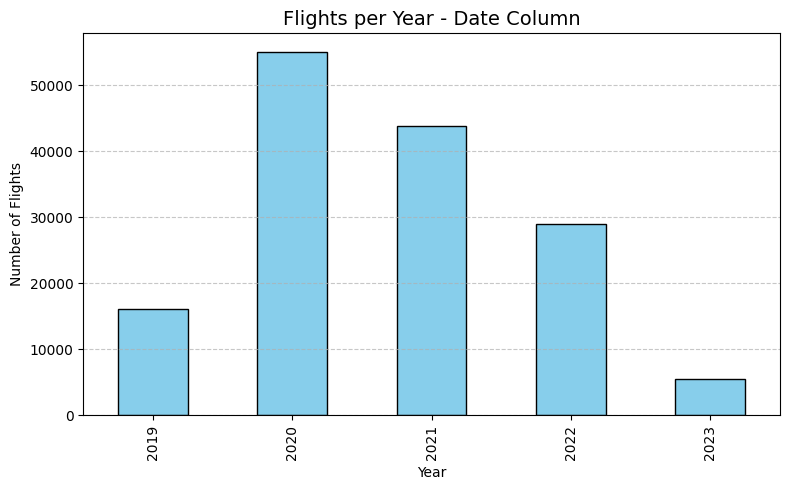

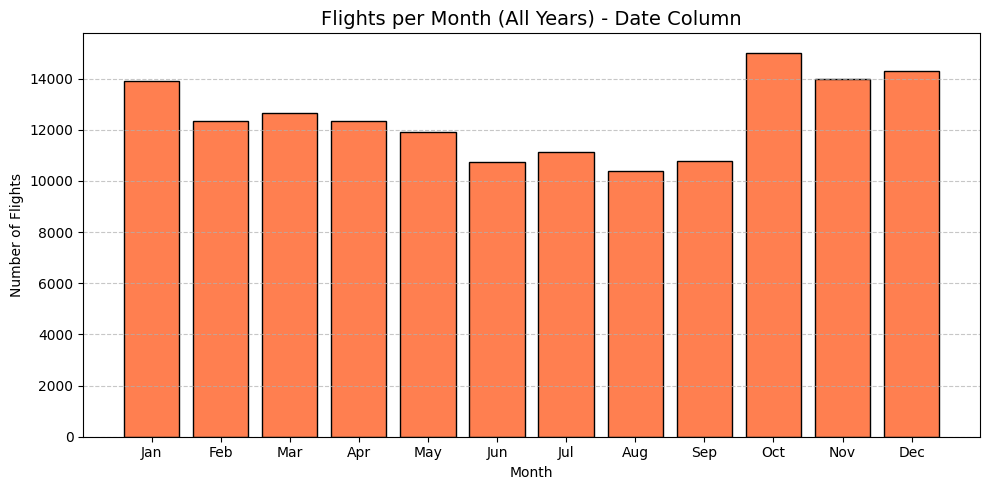

In [26]:
plot_flights_per_year(flights["date"])
plot_flights_per_month(flights["date"])

In [27]:
# Min date: 2019-09-26
# Max date: 2023-07-24
print(count_rows_between_dates(flights, "date", "2019-09-26", "2023-07-24"))
# view split for training set keeping in mind the seasonality of the data
print(count_rows_between_dates(flights, "date", "2019-09-26", "2021-05-22"))
# view split for validation set
print(count_rows_between_dates(flights, "date", "2021-05-22", "2021-12-05"))
# view split for test set
print(count_rows_between_dates(flights, "date", "2021-12-05", "2022-08-10"))
# view split for production simulation
print(count_rows_between_dates(flights, "date", "2022-08-10", "2023-07-24"))


Rows between 2019-09-26 and 2023-07-24: 149484 (100.00% of total)
149484
Rows between 2019-09-26 and 2021-05-22: 89935 (60.16% of total)
89935
Rows between 2021-05-22 and 2021-12-05: 22568 (15.10% of total)
22568
Rows between 2021-12-05 and 2022-08-10: 22556 (15.09% of total)
22556
Rows between 2022-08-10 and 2023-07-24: 14675 (9.82% of total)
14675


#### ✈️ Flight Data Split Summary

| Split                  | Date Range                | Rows   | % of Total |
|------------------------|--------------------------|--------|------------|
| **Train**              | 2019-09-26 to 2021-05-22 | 89,935 | 60.16%     |
| **Validation**         | 2021-05-22 to 2021-12-05 | 22,568 | 15.10%     |
| **Test**               | 2021-12-05 to 2022-08-10 | 22,556 | 15.09%     |
| **Production Sim** 🚦  | 2022-08-10 to 2023-07-24 | 14,675 | 9.82%      |
| **Total**              | 2019-09-26 to 2023-07-24 | 149,484| 100.00%    |

#### 📝 Insights

- **Chronological splits** prevent data leakage and reflect real-world model deployment.
- **Seasonality is preserved**: Each split covers multiple months, capturing holiday and travel patterns.
- **Balanced validation and test sets** ensure reliable tuning and unbiased evaluation.
- **Production simulation** (🚦) uses the latest data to mimic real-world retraining and drift monitoring.

#### 💡 Why Split This Way?

- Mimics how models are used in production (train on past, predict on future).
- Ensures all seasonal and business cycles are represented.
- Supports robust model evaluation and lifecycle management.

### **Missing Values**


In [28]:
check_missing(flights)

,Missing Values,Percentage
from,0,0.0
to,0,0.0
flightType,0,0.0
price,0,0.0
time,0,0.0
distance,0,0.0
agency,0,0.0
date,0,0.0
month,0,0.0
year,0,0.0


#### 🕵️‍♂️ **Missing Value Assessment**

-   ✅ **No Missing Data Found:** A thorough check for missing values across all columns and rows confirmed that the current dataset is complete. There are **no missing values** in any cell.

-   **Implication for Current Analysis:** This is a positive finding for the initial EDA and model prototyping phases, as it simplifies preprocessing by eliminating the need for immediate imputation strategies for the existing data.

-   **Consideration for Production Pipelines:** While the current dataset is clean, it's crucial to design production MLOps pipelines to be robust against potential missing data in future incoming flight records. Therefore, strategies for handling missing values (e.g., imputation or flagging) should still be incorporated into the production data preprocessing steps.

###

## **Analysis on Training Set**

### **Spitting Data into Training, Valdiation, Testing and Holdout(For Production Simulation) Sets**


| Split                  | Date Range                | Rows   | % of Total |
|------------------------|--------------------------|--------|------------|
| **Train**              | 2019-09-26 to 2021-05-22 | 89,935 | 60.16%     |
| **Validation**         | 2021-05-23 to 2021-12-05 | 22,568 | 15.10%     |
| **Test**               | 2021-12-06 to 2022-08-10 | 22,556 | 15.09%     |
| **Production Sim** 🚦  | 2022-08-11 to 2023-07-24 | 14,675 | 9.82%      |
| **Total**              | 2019-09-26 to 2023-07-24 | 149,484| 100.00%    |



In [29]:
all_sets_dict = chronological_split(
    flights,
    "date",
    "price",
    "2021-05-22",  # train_end
    "2021-12-05",  # val_end
    "2022-08-10",  # test_end
)

# Now unpack each tuple from the dictionary
train_x, train_y = all_sets_dict["train"]
validation_x, validation_y = all_sets_dict["validation"]
test_x, test_y = all_sets_dict["test"]

# For the 'holdout' set:
holdout_x, holdout_y = all_sets_dict["holdout"]


In [30]:
flights_train = train_x.copy()
flights_train["price"] = train_y
flights_train.sample(5)

,from,to,flightType,time,distance,agency,date,month,year,day,price
18791,Sao Paulo (SP),Recife (PE),economic,1.26,486.519989,Rainbow,2020-01-17,1,2020,17,827.119995
55134,Recife (PE),Brasilia (DF),firstClass,0.63,242.210007,CloudFy,2020-09-10,9,2020,10,709.250000
64731,Rio de Janeiro (RJ),Sao Paulo (SP),economic,0.86,331.890015,Rainbow,2020-11-14,11,2020,14,452.559998
15090,Campo Grande (MS),Brasilia (DF),premium,0.72,277.700012,CloudFy,2019-12-26,12,2019,26,661.320007
72230,Recife (PE),Natal (RN),economic,0.58,222.669998,Rainbow,2021-01-08,1,2021,8,360.220001


### 📑 **Extensive Automated EDA for Training Set**
- This will generate a extensive EDA report fot the training set.

In [31]:
report_cols = [
    "from",
    "to",
    "flightType",
    "time",
    "distance",
    "agency",
    "date",
    "month",
    "day",
    "price",
]


In [32]:
flights_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89935 entries, 0 to 89934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   from        89935 non-null  category      
 1   to          89935 non-null  category      
 2   flightType  89935 non-null  category      
 3   time        89935 non-null  float32       
 4   distance    89935 non-null  float32       
 5   agency      89935 non-null  category      
 6   date        89935 non-null  datetime64[ns]
 7   month       89935 non-null  uint8         
 8   year        89935 non-null  category      
 9   day         89935 non-null  uint8         
 10  price       89935 non-null  float32       
dtypes: category(5), datetime64[ns](1), float32(3), uint8(2)
memory usage: 3.0 MB


In [ ]:
# generate_eda_report(
#     flights_train,
#     "Flights Training set EDA Report",
#     "../reports/eda/flights_training_eda_report.html",
#     minimal=False,
#     explorative=True,
# )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 31.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved to ../reports/eda/flights_training_eda_report.html


### **5 Number Summary**

In [181]:
flights_train.describe(include="number")

,time,distance,month,year,day,price
count,89935.000000,89935.000000,89935.000000,89935.000000,89935.000000,89935.000000
mean,1.350871,519.917725,6.426597,2020.028176,15.760327,944.785095
std,0.548463,211.149643,3.745957,0.621773,8.800451,357.462952
min,0.440000,168.220001,1.000000,2019.000000,1.000000,301.510010
25%,0.850000,327.549988,3.000000,2020.000000,8.000000,667.000000
50%,1.440000,555.739990,6.000000,2020.000000,16.000000,889.070007
75%,1.760000,676.530029,10.000000,2020.000000,23.000000,1209.040039
max,2.440000,937.770020,12.000000,2021.000000,31.000000,1754.170044


In [182]:
flights_train.describe(include="category")

,from,to,flightType,agency
count,89935,89935,89935,89935
unique,9,9,3,3
top,Campo Grande (MS),Florianopolis (SC),firstClass,Rainbow
freq,11020,18337,38498,38557


In [185]:
flights_train.describe(include="datetime")

,date
count,89935
mean,2020-07-09 01:49:17.696113920
min,2019-09-26 00:00:00
25%,2020-02-08 00:00:00
50%,2020-07-02 00:00:00
75%,2020-12-04 00:00:00
max,2021-05-22 00:00:00


In [202]:
flights_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89935 entries, 0 to 89934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   from        89935 non-null  category      
 1   to          89935 non-null  category      
 2   flightType  89935 non-null  category      
 3   time        89935 non-null  float32       
 4   distance    89935 non-null  float32       
 5   agency      89935 non-null  category      
 6   date        89935 non-null  datetime64[ns]
 7   month       89935 non-null  uint8         
 8   year        89935 non-null  uint16        
 9   day         89935 non-null  uint8         
 10  price       89935 non-null  float32       
dtypes: category(4), datetime64[ns](1), float32(3), uint16(1), uint8(2)
memory usage: 3.1 MB


In [ ]:
flights_num_train = flights_train[["time", "distance", "date", "month", "day", "price"]]

### 📊 **Univariate Analysis of Numerical Features**

#### **Distribution Of Numerical Columns**

In [186]:
flights_train_num = flights_train.select_dtypes(include=["number"]).columns.tolist()
flights_train_num

['time', 'distance', 'month', 'year', 'day', 'price']

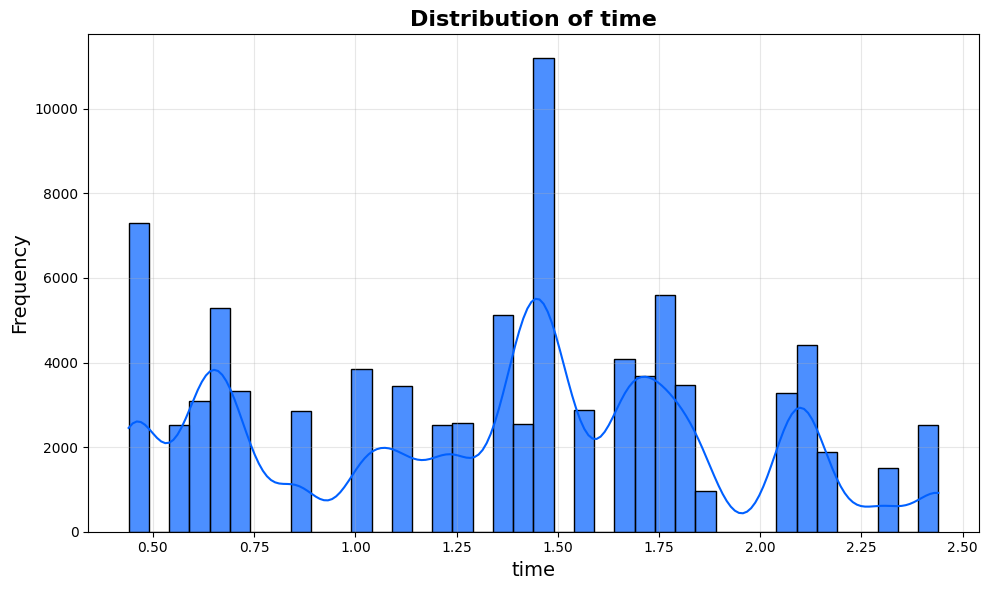

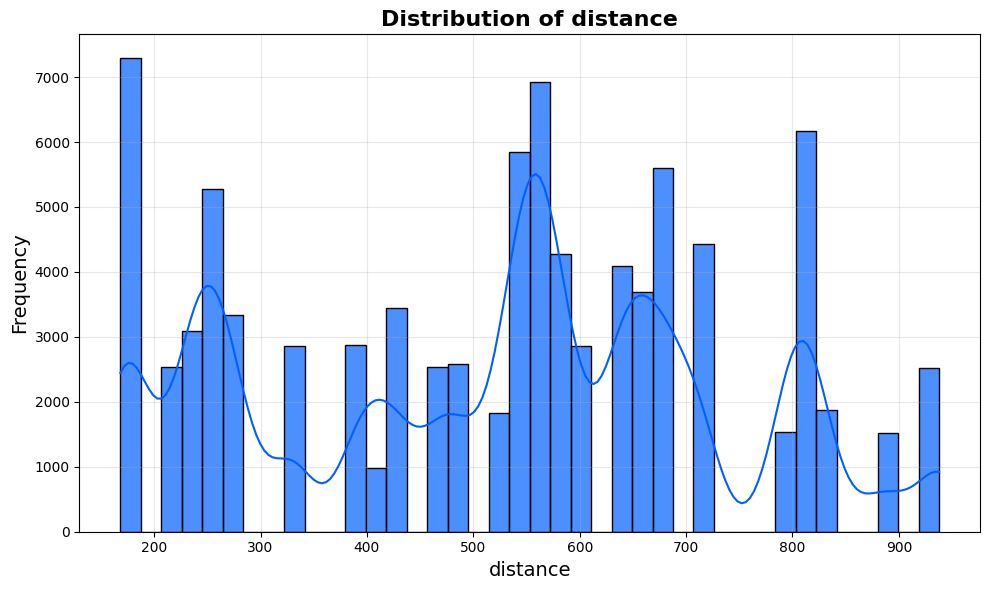

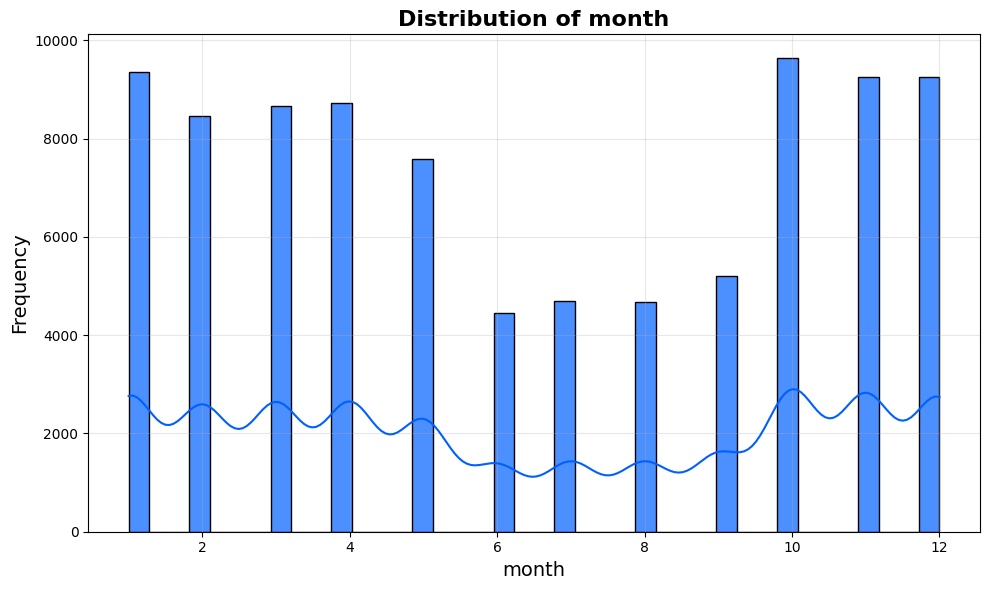

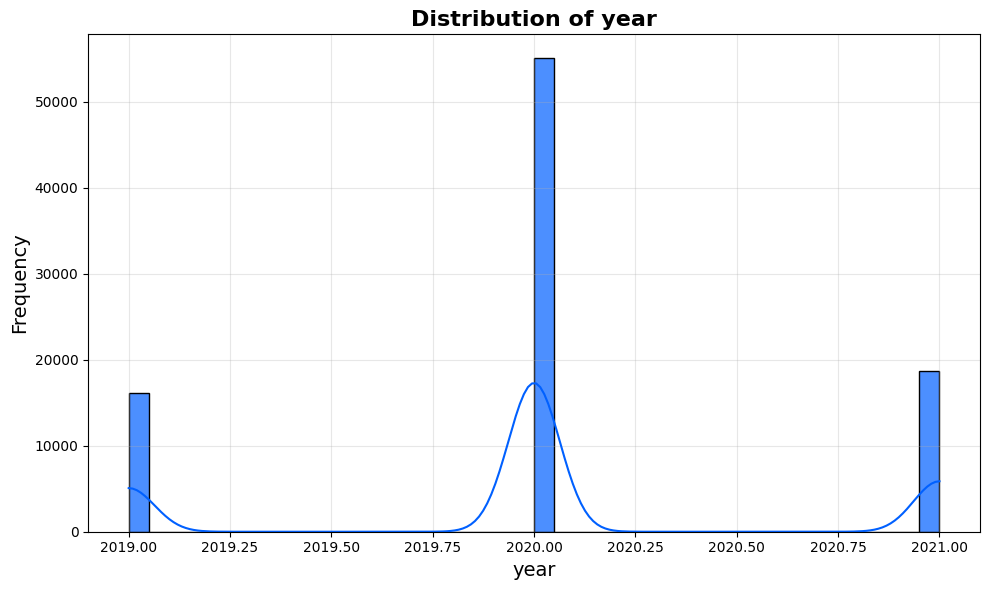

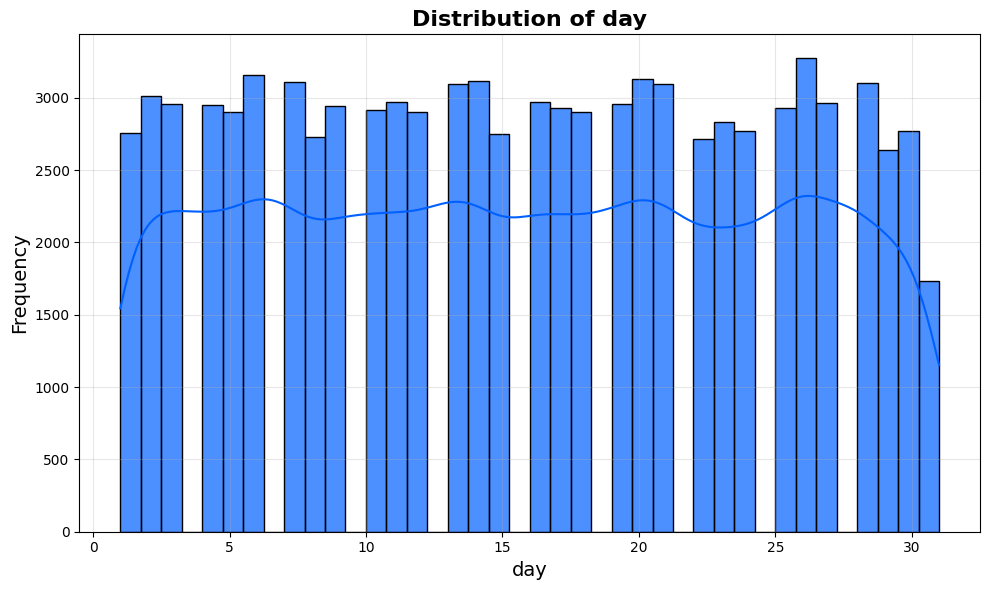

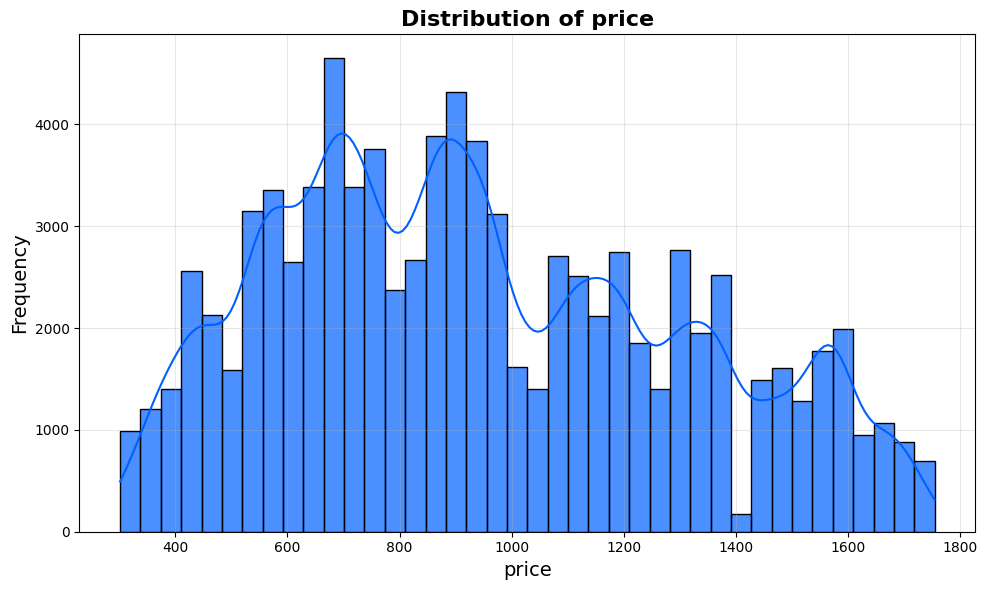

In [ ]:
flights_distribution(flights_train, flights_train_num)